C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '


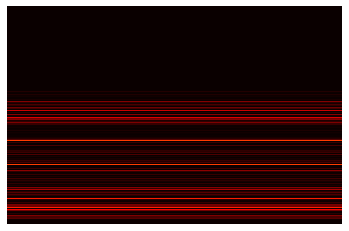

In [66]:
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
from scipy import signal

# Load the WAV file
sample_rate, samples = wavfile.read('wavs/riff_raff.wav')

# Calculate the spectrogram
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

# Plot the spectrogram
plt.imshow(spectrogram, aspect='auto', origin='lower',
           cmap='hot', interpolation='nearest')
plt.axis('off')
plt.savefig('spectrs/spec.png', bbox_inches='tight', pad_inches=0)

In [64]:
import guitarpro

gp_file = guitarpro.parse('test2.gp5')


tab = ''
for track in gp_file.tracks:
    for measure in track.measures:
        tab += "M: "
        for voice in measure.voices:
            for beat in voice.beats:
                #tab += "B"
                for note in beat.notes:
                    #print(note)
                    tab += str(note.value)+"on"+str(note.string)
                else:
                    tab += '-'
            tab += '|'
       # tab += '\n'

In [65]:
print(tab)

M: 6on34on5-6on3-6on36on4-4on3-1on32on4-|-|M: 0on5-2on4-1on3-1on32on4-4on4-0on5-|-|


In [84]:
# Extract the necessary information
import xml.etree.ElementTree as ET

tree = ET.parse('good.xml')
root = tree.getroot()

notes = []

for measure in root.findall(".//measure"):
    notes.append("MMM")
    for note in measure.findall(".//note"):
        notes.append("NOTE")
        pitch = note.find('pitch')
        step = pitch.find('step').text
        octave = pitch.find('octave').text
        alter = pitch.find('alter')
        if alter is not None:
            alter = alter.text
        duration = int(note.find('duration').text)
        voice = int(note.find('voice').text)
        note_type = note.find('type').text
        notes.append({
            'step': step,
            'alter': alter,
            'octave': octave,
            'duration': duration,
            'voice': voice,
            'type': note_type,
        })

print(notes)


['MMM', 'NOTE', {'step': 'E', 'alter': None, 'octave': '3', 'duration': 1, 'voice': 1, 'type': 'quarter'}, 'NOTE', {'step': 'F', 'alter': None, 'octave': '4', 'duration': 1, 'voice': 1, 'type': 'quarter'}, 'NOTE', {'step': 'A', 'alter': '1', 'octave': '4', 'duration': 1, 'voice': 1, 'type': 'quarter'}, 'NOTE', {'step': 'F', 'alter': '1', 'octave': '5', 'duration': 1, 'voice': 1, 'type': 'quarter'}, 'NOTE', {'step': 'G', 'alter': '1', 'octave': '4', 'duration': 1, 'voice': 1, 'type': 'quarter'}, 'NOTE', {'step': 'E', 'alter': None, 'octave': '4', 'duration': 1, 'voice': 1, 'type': 'quarter'}, 'NOTE', {'step': 'C', 'alter': None, 'octave': '4', 'duration': 1, 'voice': 1, 'type': 'quarter'}, 'MMM']


In [85]:
import xml.etree.ElementTree as ET

tree = ET.parse('good.xml')
root = tree.getroot()

notes = []

for measure in root.findall(".//measure"):
    notes.append("MMM")
    for note in measure.findall(".//note"):
        notes.append("NOTE")
        technical = note.find('notations/technical')
        if technical is not None:
            string = technical.find('string').text
            fret = technical.find('fret').text
            notes.append({
                'string': string,
                'fret': fret
            })


In [86]:
notes

['MMM',
 'NOTE',
 {'string': '6', 'fret': '0'},
 'NOTE',
 {'string': '4', 'fret': '3'},
 'NOTE',
 {'string': '3', 'fret': '3'},
 'NOTE',
 {'string': '1', 'fret': '2'},
 'NOTE',
 {'string': '3', 'fret': '1'},
 'NOTE',
 {'string': '4', 'fret': '2'},
 'NOTE',
 {'string': '5', 'fret': '3'},
 'MMM']

In [142]:
import xml.etree.ElementTree as ET

tree = ET.parse('test2.xml')
root = tree.getroot()

notes = []
chord_notes = []

for measure in root.findall(".//measure"):
    for note in measure.findall(".//note"):
        technical = note.find('notations/technical')
        if technical is not None:
            string = technical.find('string').text
            fret = technical.find('fret').text
            t = note.find('type').text
            notes.append({
                'string': string,
                'fret': fret,
                'type' : t
            })
        
        chord = note.find('chord')
        if chord is not None:
            chord_notes.append(len(notes)-1)

            

for idx in chord_notes:
    notes[idx]["</chord>"] = True


In [143]:
notes

[{'string': '5', 'fret': '4', 'type': 'quarter'},
 {'string': '3', 'fret': '6', 'type': 'quarter', '</chord>': True},
 {'string': '3', 'fret': '6', 'type': 'eighth'},
 {'string': '4', 'fret': '6', 'type': 'quarter'},
 {'string': '3', 'fret': '6', 'type': 'quarter', '</chord>': True},
 {'string': '3', 'fret': '4', 'type': 'quarter'},
 {'string': '4', 'fret': '2', 'type': 'eighth'},
 {'string': '3', 'fret': '1', 'type': 'eighth', '</chord>': True},
 {'string': '5', 'fret': '0', 'type': 'eighth'},
 {'string': '4', 'fret': '2', 'type': 'eighth'},
 {'string': '3', 'fret': '1', 'type': 'eighth'},
 {'string': '4', 'fret': '2', 'type': 'quarter'},
 {'string': '3', 'fret': '1', 'type': 'quarter', '</chord>': True},
 {'string': '4', 'fret': '4', 'type': 'quarter'},
 {'string': '5', 'fret': '0', 'type': 'eighth'}]

In [144]:
import numpy as np

# Define the vocabularies
string_vocab = ['1', '2', '3', '4', '5', '6']
fret_vocab = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
type_vocab = ['eighth','quarter', 'half', 'whole']
chord_vocab = [False, True]

# Encode each note as a one-hot vector
def encode_note(note):
    string_one_hot = np.zeros(len(string_vocab))
    string_one_hot[string_vocab.index(note['string'])] = 1
    fret_one_hot = np.zeros(len(fret_vocab))
    fret_one_hot[fret_vocab.index(note['fret'])] = 1
    type_one_hot = np.zeros(len(type_vocab))
    type_one_hot[type_vocab.index(note['type'])] = 1
    chord_one_hot = np.zeros(len(chord_vocab))
    if '</chord>' in note:
        chord_one_hot[chord_vocab.index(True)] = 1
    else:
        chord_one_hot[chord_vocab.index(False)] = 1
    return np.concatenate([string_one_hot, fret_one_hot, type_one_hot, chord_one_hot])

# Encode each measure as a matrix of note vectors
def encode_measure(measure):
    return np.array([encode_note(note) for note in measure])

# Encode all measures as a list of matrices
measures = [
    encode_measure(notes),
]



In [145]:
for i in measures:
    print(i)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
  0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  1.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
  0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.